# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


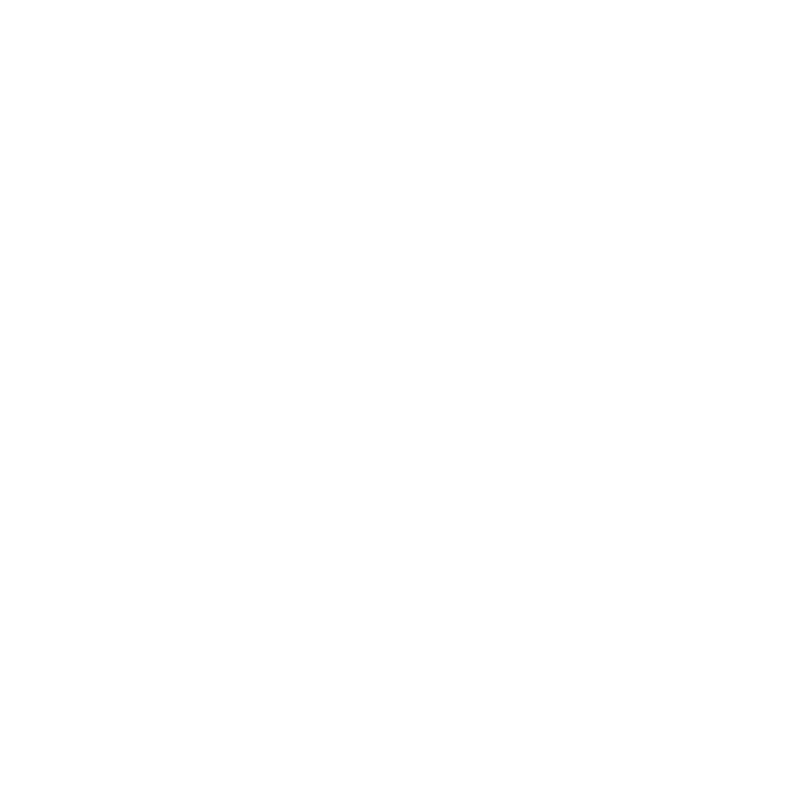

In [55]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
plt.xticks(np.arange(1,365,30))

([<matplotlib.axis.XTick at 0x7f54a4aee9b0>,
 <a list of 13 Text xticklabel objects>)

<IPython.core.display.Javascript object>


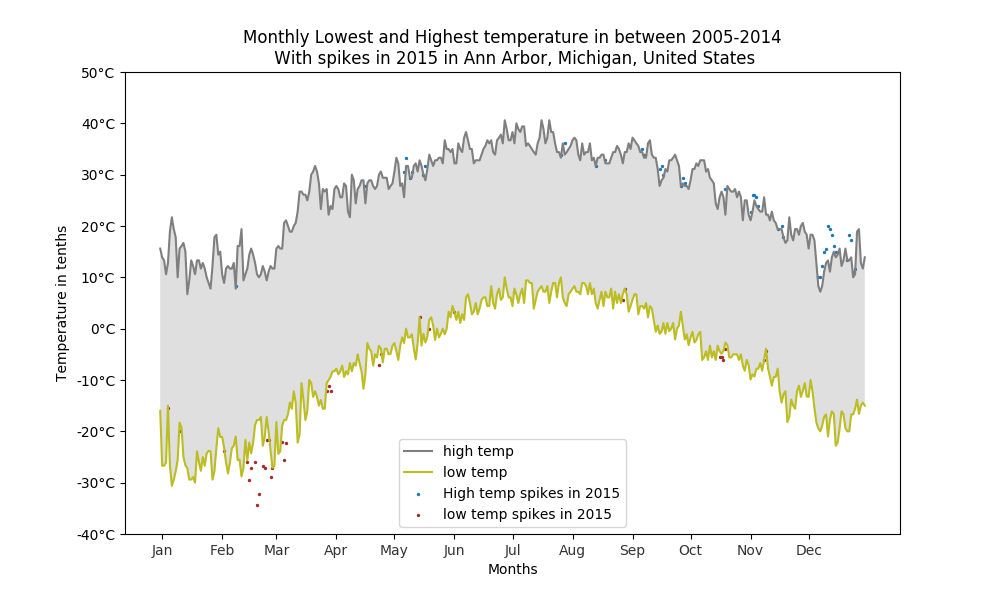

In [70]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mplleaflet
import matplotlib as mpl
mpl.get_backend()
import pandas as pd
import datetime as dt
from datetime import date
import numpy as np
import matplotlib.dates as mdates

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

dates = pd.to_datetime(df['Date'])
df['Date'] = dates

# picking only for year 2015
df1 = df[df['Date'] >'2014-12-31'].sort_values(by = 'Date')

# picking from 2005-2014
df2 = df[df['Date'] <='2014-12-31'].sort_values(by = 'Date')

# removing the year from the date column and renaming it
df1['Month-Day'] = df1['Date'].dt.strftime('%m-%d')
df2['Month-Day'] = df2['Date'].dt.strftime('%m-%d')

# for 2005-2014 get only the data fram containing Tmax and Tmin
df_Tmax = df2[df2['Element'] == 'TMAX']
df_Tmin = df2[df2['Element'] == 'TMIN']

# groupby Month-Day and find max and min Data value for each day
df_Tmax = df_Tmax.groupby('Month-Day')['Data_Value'].agg(['max'])
df_Tmin = df_Tmin.groupby('Month-Day')['Data_Value'].agg(['min'])

# for 2015 get only the data fram containing Tmax and Tmin
df_Tmax2015 = df1[df1['Element'] == 'TMAX']
df_Tmin2015 = df1[df1['Element'] == 'TMIN']

# groupby Month-Day and find max and min Data value for each day 2015 dataframe
df_Tmax2015 = df_Tmax2015.groupby('Month-Day')['Data_Value'].agg(['max'])
df_Tmin2015 = df_Tmin2015.groupby('Month-Day')['Data_Value'].agg(['min'])

#renaming columns
df_Tmax2015.rename(columns = {'max': 'max2015'}, inplace = True)
df_Tmin2015.rename(columns = {'min': 'min2015'}, inplace = True)

#dropping the leap years for 2005-2014
df_Tmax.drop('02-29', inplace = True)
df_Tmin.drop('02-29', inplace = True)
df_Tmin = df_Tmin.reset_index()
df_Tmax = df_Tmax.reset_index()
df_Tmax2015 = df_Tmax2015.reset_index()
df_Tmin2015 = df_Tmin2015.reset_index()

#srt the sixe of the figure and plot
plt.figure(figsize = (10,6))
plt.plot(df_Tmax['max'], label = 'high temp', c = '#7f7f7f')
plt.plot(df_Tmin['min'], label = 'low temp', c = '#bcbd22')

# fill the space between the max and min 
plt.gca().fill_between(range(len(df_Tmax['max'])), df_Tmin['min'], df_Tmax['max'], facecolor='grey', alpha=0.25)


month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
DayOfMonth=[1,32,60,91,121,152,182,213,244,274,305,335]

plt.xticks(DayOfMonth)
plt.xticks(DayOfMonth,month,alpha=0.8)

#create new dataframes for the  max and min containing 2015 data and 2005-2014 as columns
dfnew_max = pd.DataFrame({
        'max_2005-2014':df_Tmax['max'],
        'max_2015':df_Tmax2015['max2015']})
dfnew_min = pd.DataFrame({
        'min_2005-2014':df_Tmin['min'],
        'min_2015':df_Tmin2015['min2015']})

# find the max and min of the rwo two rows
dfnew_max['max'] = dfnew_max.max(axis =1)
dfnew_min['min'] = dfnew_min.min(axis =1)

# create a column for the max and min spikes for each new dataframe
dfnew_max['hikes-max'] = np.where((dfnew_max['max_2015']==dfnew_max['max']), dfnew_max['max_2015'], np.nan)
dfnew_min['hikes-min'] = np.where((dfnew_min['min_2015']==dfnew_min['min']), dfnew_min['min_2015'], np.nan)

#drop the rows without spikes
dfnew_max.dropna(inplace =True)
dfnew_min.dropna(inplace =True)

#scatter plot for the spikes
plt.scatter(dfnew_max.index,dfnew_max['hikes-max'], c= '#1f77b4',s = 2, label = 'High temp spikes in 2015')
plt.scatter(dfnew_min.index,dfnew_min['hikes-min'],c= 'brown', s = 2, label = 'low temp spikes in 2015')
plt.title('Monthly Lowest and Highest temperature in between 2005-2014\n With spikes in 2015 in Ann Arbor, Michigan, United States')
plt.ylabel('Temperature in tenths')
plt.xlabel('Months')
pos,labels=plt.yticks()
newpos=[]
for i in pos:
    newpos.append(str(int(i/10))+u'\N{DEGREE SIGN}'+'C')
plt.yticks(pos,newpos) 
plt.legend()